## Task A

### 1.

In [11]:
import kagglehub
import os
import zipfile
import pandas as pd
import numpy as np

In [ ]:
os.environ["KAGGLE_USERNAME"] = "abhishek"
os.environ["KAGGLE_KEY"] = "d3770343aee65896525d074bcf5b6b97"


path = kagglehub.dataset_download("hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages")

print("Path to dataset files:", path)

100%|██████████| 17.9G/17.9G [03:23<00:00, 94.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1


In [2]:
print("Contents of the dataset directory:")
for root, dirs, files in os.walk(path):
    print(root, dirs, files)

Contents of the dataset directory:
/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1 ['Language Detection Dataset'] []
/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset ['Punjabi', 'Gujarati', 'Marathi', 'Malayalam', 'Bengali', 'Urdu', 'Telugu', 'Hindi', 'Kannada', 'Tamil'] []
/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Punjabi [] ['5286.mp3', '3366.mp3', '22042.mp3', '9450.mp3', '13107.mp3', '24092.mp3', '8628.mp3', '1953.mp3', '17642.mp3', '4552.mp3', '10329.mp3', '14353.mp3', '26213.mp3', '5269.mp3', '14511.mp3', '21725.mp3', '17697.mp3', '7928.mp3', '6109.mp3', '20276.mp3', '20541.mp3', '22022.mp3', '8355.mp3', '1708.mp3', '24271.mp3', '6124.mp3', '10558.mp3', '17838.mp3', '13335.mp3', '6949.mp3', '1743.mp3', '15781.mp3', '7415.mp3', '10757.mp3', '23513.mp3', '20653.

In [3]:
dataset_path = os.path.join(path, "Language Detection Dataset")

# Collecting the audio files by language
audio_files = {}
for lang in os.listdir(dataset_path):
    lang_path = os.path.join(dataset_path, lang)
    if os.path.isdir(lang_path):
        audio_files[lang] = [os.path.join(lang_path, file) for file in os.listdir(lang_path)]

# number of files per language???
for lang, files in audio_files.items():
    print(f"{lang}: {len(files)} files")


Punjabi: 26229 files
Gujarati: 26441 files
Marathi: 25379 files
Malayalam: 24044 files
Bengali: 27258 files
Urdu: 31960 files
Telugu: 23656 files
Hindi: 25462 files
Kannada: 22208 files
Tamil: 24196 files


### 2.

In [4]:
import librosa
import numpy as np

#  extract MFCCs from audio
def extract_mfcc(audio_path, n_mfcc=13):
    y, sr= librosa.load(audio_path, sr=None)  # Load audio with original sampling rate only
    mfccs= librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)  # Extract 13 MFCCs
    return mfccs, sr

### 3.

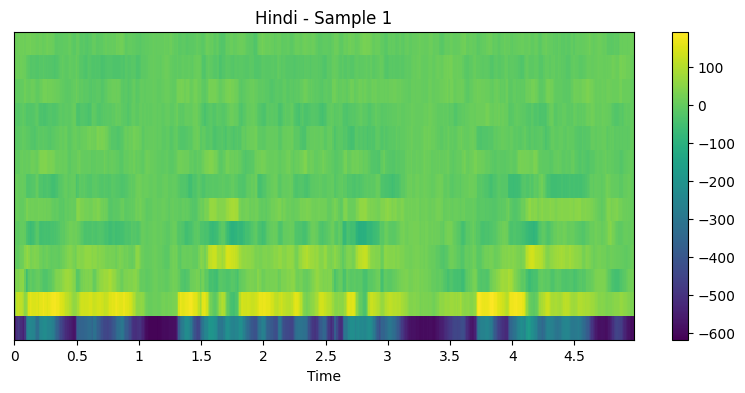

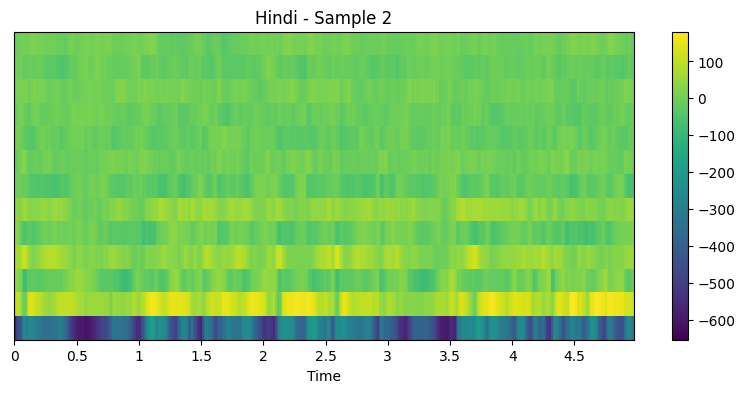

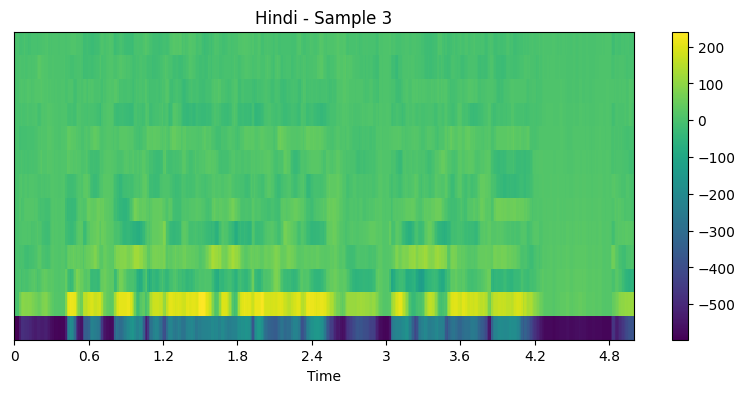

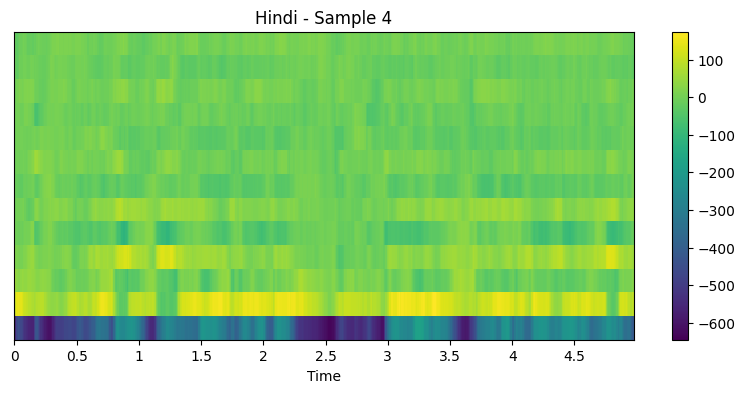

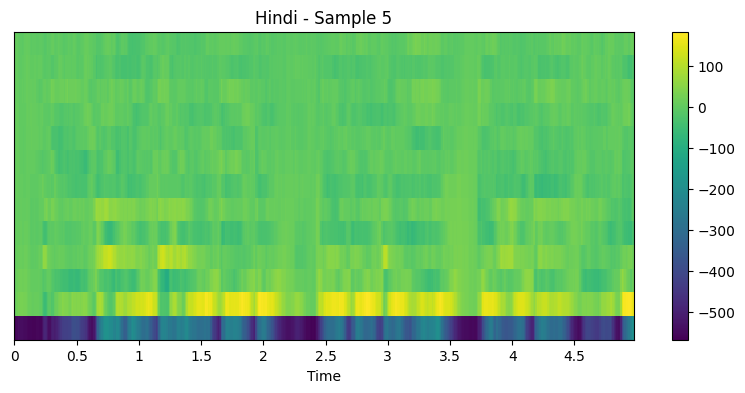

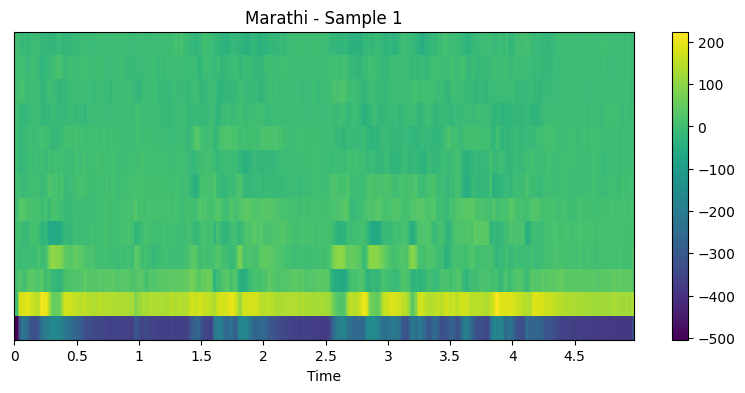

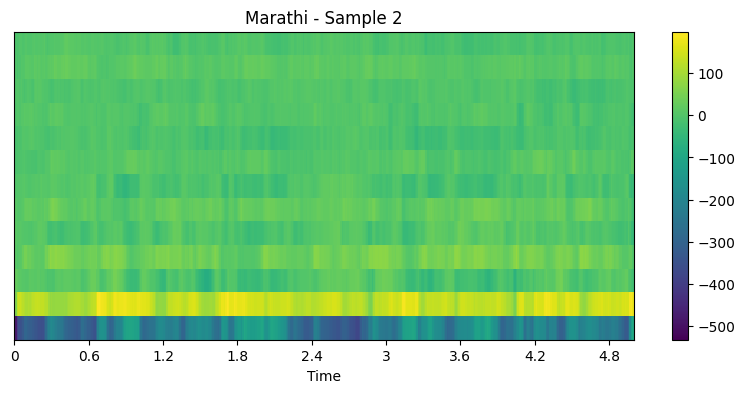

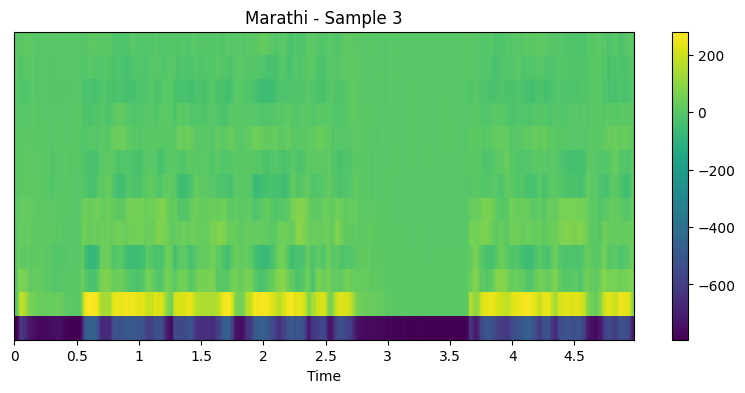

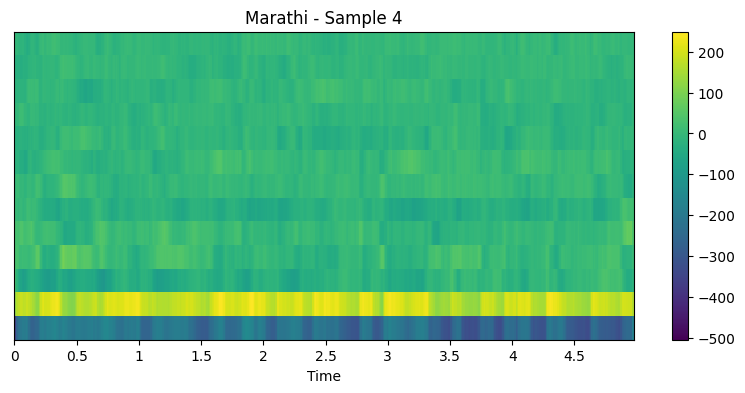

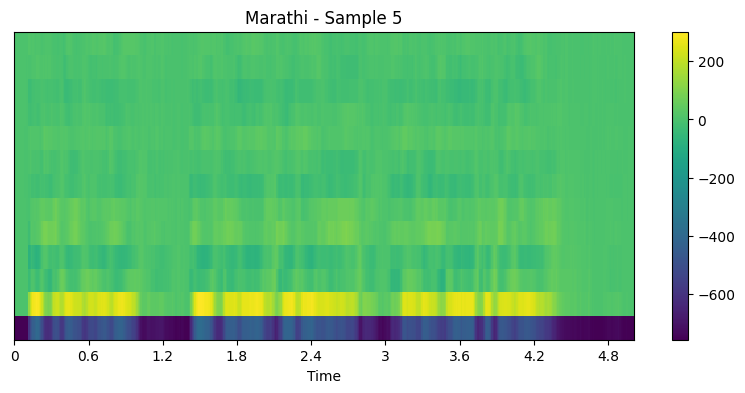

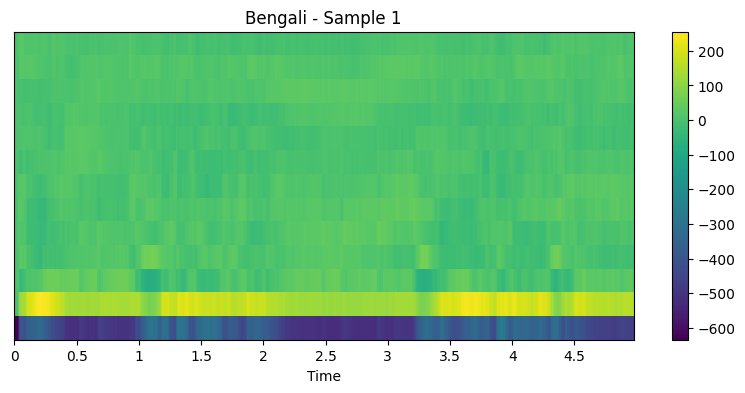

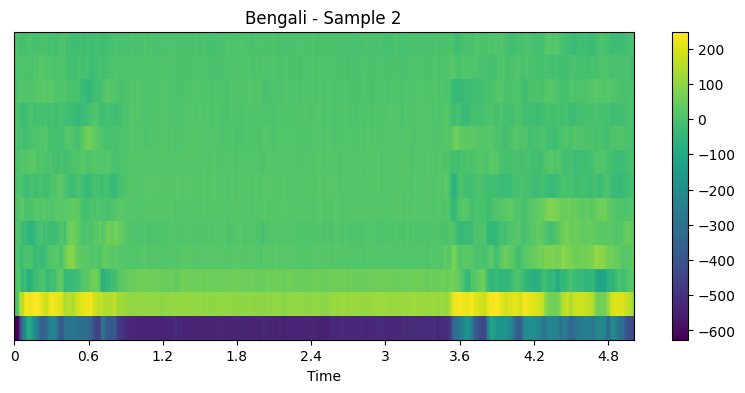

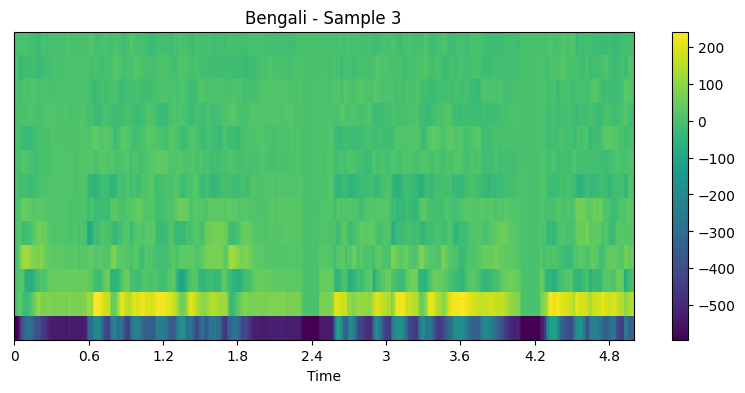

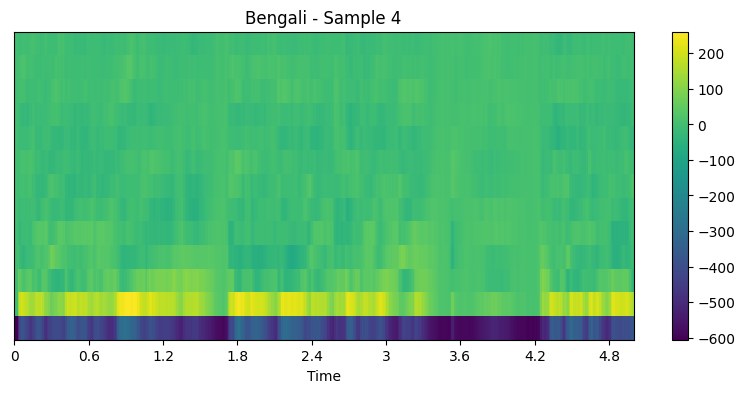

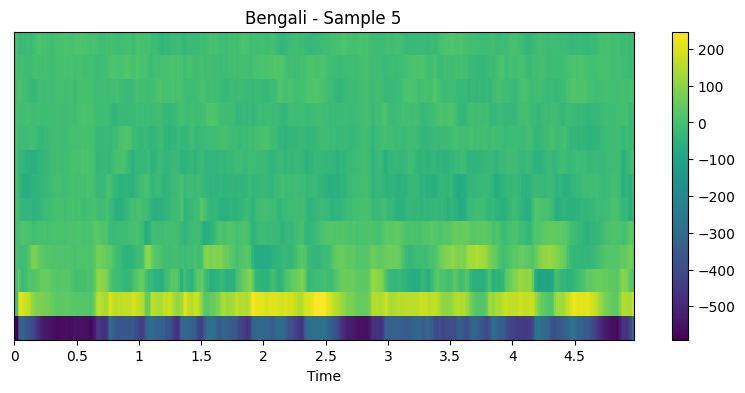

In [5]:
import librosa.display
import matplotlib.pyplot as plt
import random

# My top 3 languages
languages = ["Hindi", "Marathi", "Bengali"]
sample_files = {}

for lang in languages:
    lang_path = os.path.join(dataset_path, lang)
    audio_files = [os.path.join(lang_path, f) for f in os.listdir(lang_path) if f.endswith('.mp3')]
    sample_files[lang] = random.sample(audio_files, 5)  # Select 5 samples per language

# Visualize MFCCs
def plot_mfcc(mfccs, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="viridis")
    plt.colorbar()
    plt.title(title)
    plt.show()

# Plot MFCCs for samples from each language
for lang, files in sample_files.items():
    for idx, file in enumerate(files):
        mfccs, sr = extract_mfcc(file)
        plot_mfcc(mfccs, sr, f"{lang} - Sample {idx + 1}")

### 4.

In [6]:
sample_files

{'Hindi': ['/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Hindi/14270.mp3',
  '/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Hindi/20732.mp3',
  '/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Hindi/1415.mp3',
  '/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Hindi/22131.mp3',
  '/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Hindi/16706.mp3'],
 'Marathi': ['/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages/versions/1/Language Detection Dataset/Marathi/16640.mp3',
  '/root/.cache/kagglehub/datasets/hbchaitanyabharadwaj/audio-dataset-wi

In [7]:
# Function to compute MFCC statistics (mean & variance)
def compute_mfcc_stats(mfccs):
    mean = np.mean(mfccs, axis=1)  # Mean across time axis
    var = np.var(mfccs, axis=1)    # Variance across time axis
    return mean, var

# Analyze statistics for each language
for lang, files in sample_files.items():
    print(f"Language: {lang}")
    means, vars = [], []
    for file in files:
        mfccs, _ = extract_mfcc(file)
        mean, var = compute_mfcc_stats(mfccs)
        means.append(mean)
        vars.append(var)

    print("Mean of MFCCs:", np.mean(means, axis=0))
    print("Variance of MFCCs:", np.mean(vars, axis=0))
    print("-" * 40)


Language: Hindi
Mean of MFCCs: [-3.7344348e+02  9.8967117e+01 -2.2306199e+00  3.6723167e+01
 -1.5704767e+01  2.1661566e+01 -1.5416359e+01 -2.8434172e-01
 -7.3706985e+00 -1.0015686e+01  1.5205096e+00 -1.1240229e+01
 -1.3761050e+00]
Variance of MFCCs: [14962.1455   3241.3323   1071.1779   1058.5305    772.5879    471.29605
   345.52362   200.776     196.43918   177.83623   146.0458    138.93593
   109.19053]
----------------------------------------
Language: Marathi
Mean of MFCCs: [-393.02676    153.309        2.1814985    7.447333    12.129834
    9.210528    -6.689828    -2.3298137   -1.711937    -5.427496
   -9.986484    -2.6067238   -4.3472376]
Variance of MFCCs: [7498.88    4346.5786   692.3634   644.59106  440.22812  300.7413
  260.68658  168.44504  163.11307   95.32827  148.76558   89.10921
   99.93825]
----------------------------------------
Language: Bengali
Mean of MFCCs: [-4.12481750e+02  1.37791916e+02  1.11401758e+01  1.57404356e+01
  4.74237871e+00  3.61923203e-02 -9.25528

Please note that these values were used to create the visualization of the MFCC mean and variance graphs

## Task B

### 1.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = [], []

# Extract features (mean + variance) for all languages
for lang in os.listdir(dataset_path):
    lang_path= os.path.join(dataset_path, lang)
    audio_files= [os.path.join(lang_path, f) for f in os.listdir(lang_path) if f.endswith('.mp3')]

    for file in random.sample(audio_files, 1000):  #1000 samples per language
        mfccs, _= extract_mfcc(file)
        mean, var= compute_mfcc_stats(mfccs)
        features= np.hstack((mean, var))
        X.append(features)
        y.append(lang)

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1775
  warnings.warn(


### 2. 3.

              precision    recall  f1-score   support

     Bengali       0.91      0.93      0.92       320
    Gujarati       0.48      0.49      0.49       308
       Hindi       0.94      0.98      0.96       292
     Kannada       0.96      0.90      0.93       324
   Malayalam       0.93      0.95      0.94       303
     Marathi       0.92      0.92      0.92       288
     Punjabi       0.52      0.48      0.50       318
       Tamil       0.95      0.97      0.96       265
      Telugu       0.95      0.95      0.95       292
        Urdu       0.89      0.90      0.90       290

    accuracy                           0.84      3000
   macro avg       0.84      0.85      0.84      3000
weighted avg       0.84      0.84      0.84      3000

Accuracy: 0.8413333333333334


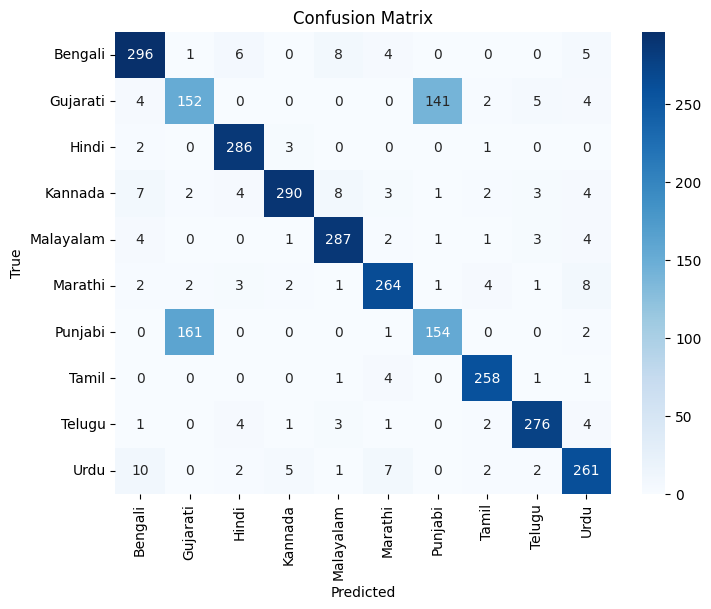

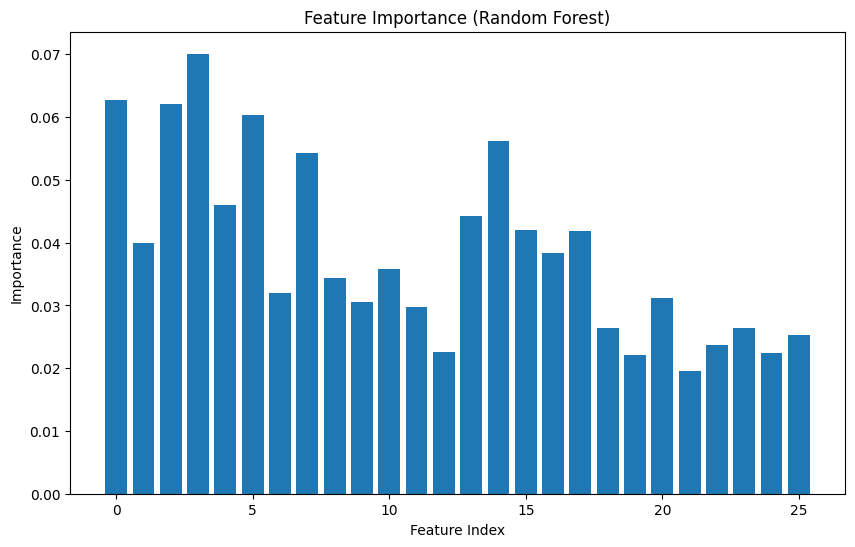

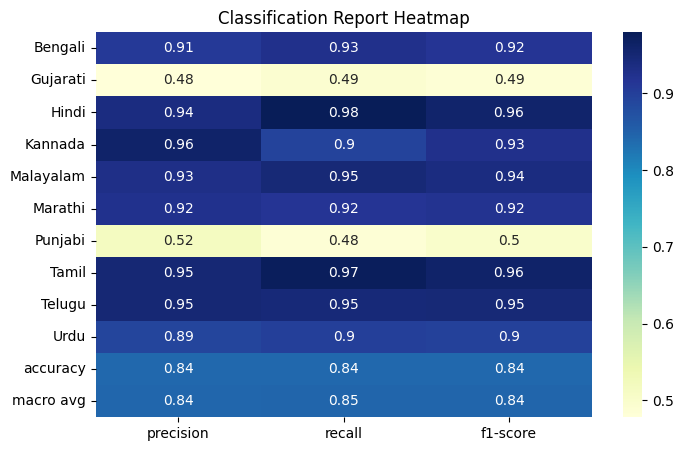

<ipython-input-17-48b93c37d0be>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


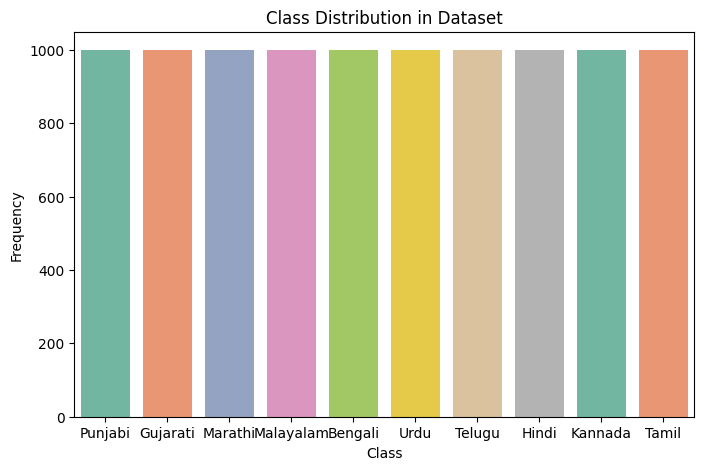

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X= np.array(X)
y= np.array(y)

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

print(classification_report(y_test, y_pred))


print("Accuracy:", accuracy_score(y_test, y_pred))

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 2. Feature Importance
importances= model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# 3. Classification Report as a Heatmap
report= classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).T
plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

# 4. Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution in Dataset")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()



In [18]:
X_train

array([[0.8050566 , 0.69959015, 0.64920443, ..., 0.1640698 , 0.13683708,
        0.12295483],
       [0.89051676, 0.56978786, 0.5489708 , ..., 0.16780026, 0.18291701,
        0.14771433],
       [0.6974886 , 0.5188309 , 0.7221735 , ..., 0.17828588, 0.31033504,
        0.17243436],
       ...,
       [0.8074702 , 0.6160256 , 0.566684  , ..., 0.16899887, 0.19316906,
        0.16930908],
       [0.8916944 , 0.7441803 , 0.53594077, ..., 0.11479791, 0.18620618,
        0.4333774 ],
       [0.6870736 , 0.37819955, 0.61976457, ..., 0.2638696 , 0.33773473,
        0.39022273]], dtype=float32)

In [19]:
y_train

array(['Tamil', 'Marathi', 'Hindi', ..., 'Urdu', 'Punjabi', 'Hindi'],
      dtype='<U9')

In [20]:
y_train.shape

(7000,)

In [21]:
X_train.shape

(7000, 26)